In [142]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"]="3"
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import csv

In [143]:
analyze_size = 45
df = pd.read_csv('shashadenim.csv')
df

,Date,Price,Open,High,Low,Vol.,Change %
0,"Jan 09, 2020",23.10,23.70,23.90,23.00,37.41K,-0.43%
1,"Jan 08, 2020",23.20,23.70,23.90,23.10,48.49K,-2.11%
2,"Jan 07, 2020",23.70,23.90,24.20,23.60,96.75K,-0.84%
3,"Jan 06, 2020",23.90,23.90,24.80,23.80,86.34K,-0.83%
4,"Jan 05, 2020",24.10,24.90,24.90,23.90,114.78K,-2.43%
...,...,...,...,...,...,...,...
1163,"Mar 12, 2015",28.26,28.70,29.13,27.97,4.97M,-1.26%
1164,"Mar 11, 2015",28.62,27.31,29.21,27.09,8.48M,5.38%
1165,"Mar 10, 2015",27.16,27.89,28.40,27.02,3.82M,-3.14%
1166,"Mar 09, 2015",28.04,27.24,28.91,27.24,5.47M,3.24%


In [144]:
df.shape

(1168, 7)

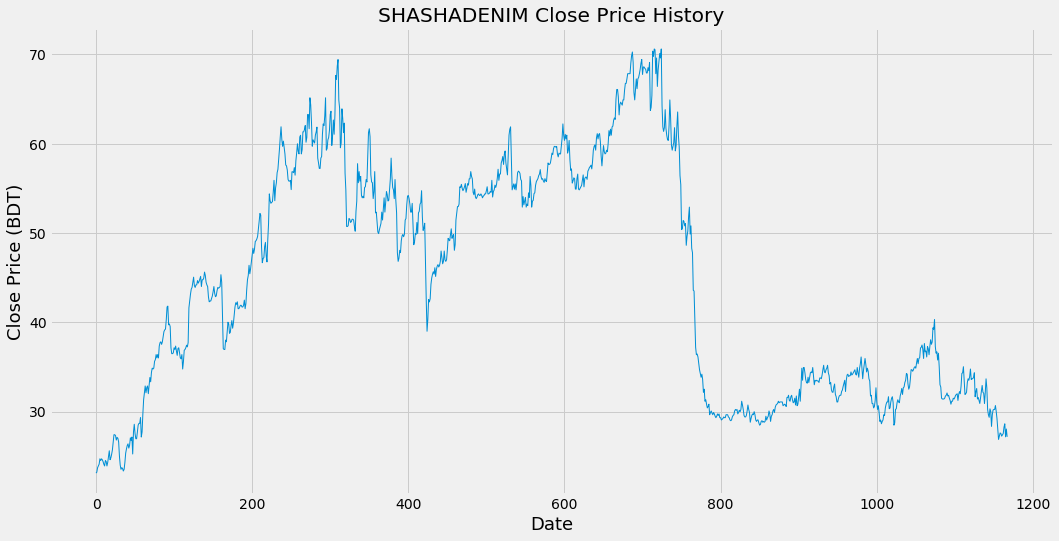

In [145]:
plt.figure(figsize=(16,8))
plt.title('SHASHADENIM Close Price History')
plt.plot(df['Price'], linewidth = 1)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price (BDT)', fontsize=18)
plt.show()

In [146]:
# create dataframe only with close column
data = df.filter(['Price'])
# dataframe to numpy array
dataset = data.values
training_data_len = math.ceil(len(dataset) * 0.8)
training_data_len

935

In [147]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.        ],
       [0.00210438],
       [0.01262626],
       ...,
       [0.08543771],
       [0.10395623],
       [0.08543771]])

In [148]:
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []

for i in range(analyze_size, len(train_data)):
    x_train.append(train_data[i-analyze_size:i, 0])
    y_train.append(train_data[i, 0])
    if i <= analyze_size:
        print(x_train)
        print(y_train)
        print()


[array([0.        , 0.00210438, 0.01262626, 0.01683502, 0.02104377,
       0.03367003, 0.02946128, 0.03367003, 0.03156566, 0.0273569 ,
       0.02104377, 0.01683502, 0.02946128, 0.0273569 , 0.01683502,
       0.02525253, 0.03998316, 0.05260943, 0.03156566, 0.03577441,
       0.04419192, 0.0547138 , 0.0736532 , 0.09048822, 0.09048822,
       0.08838384, 0.07786195, 0.08417508, 0.08207071, 0.0736532 ,
       0.03998316, 0.01893939, 0.00883838, 0.0128367 , 0.01094276,
       0.00484007, 0.00883838, 0.02504209, 0.04692761, 0.05702862,
       0.06502525, 0.06902357, 0.05892256, 0.06502525, 0.0831229 ])]
[0.07702020202020204]



In [149]:
x_train = np.array(x_train)
y_train = np.array(y_train)

In [150]:
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(890, 45, 1)

In [151]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [152]:
#compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [153]:
#train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
890/890 [==============================] - 23s 26ms/step - loss: 0.0073


In [154]:
#create a new array containing scaled values from 1543 to 2003
test_data = scaled_data[training_data_len-analyze_size: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(analyze_size, len(test_data)):
    x_test.append(test_data[i-analyze_size:i, 0])
    


In [155]:
x_test = np.array(x_test)
type(x_test)

numpy.ndarray

In [156]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(233, 45, 1)

In [157]:
# get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
len(predictions)

233

In [158]:
# get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.3668672690985029

In [159]:
# plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
valid

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Price,Predictions
935,34.68,33.715366
936,34.85,33.830509
937,35.18,33.946400
938,34.34,34.082317
939,34.01,34.140949
...,...,...
1163,28.26,27.166780
1164,28.62,27.125631
1165,27.16,27.188482
1166,28.04,27.182304


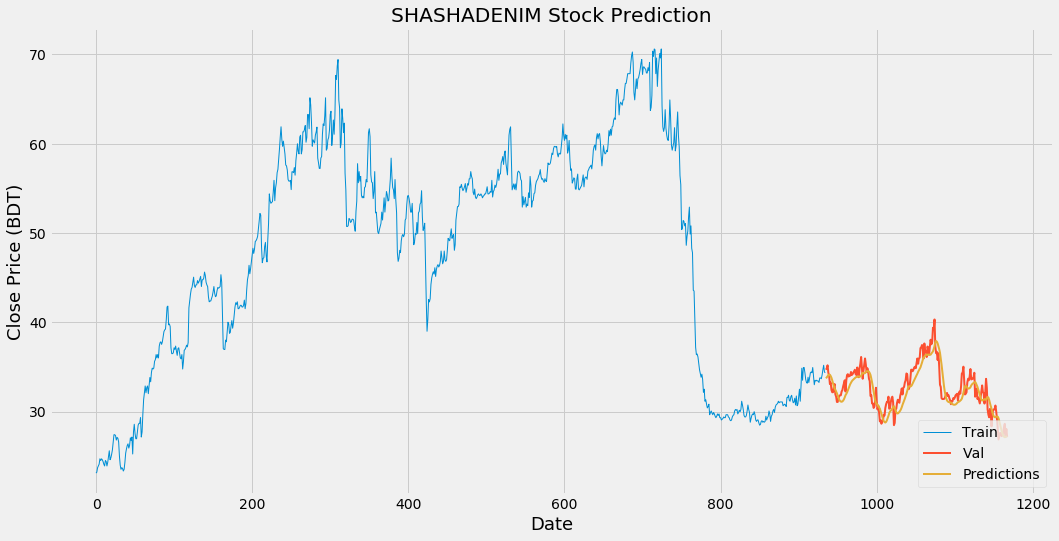

In [160]:
# visualize the data
plt.figure(figsize=(16,8))
plt.title('SHASHADENIM Stock Prediction')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price (BDT)', fontsize=18)
plt.plot(train['Price'], linewidth = 1)
plt.plot(valid, linewidth=2)
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [161]:
valid

,Price,Predictions
935,34.68,33.715366
936,34.85,33.830509
937,35.18,33.946400
938,34.34,34.082317
939,34.01,34.140949
...,...,...
1163,28.26,27.166780
1164,28.62,27.125631
1165,27.16,27.188482
1166,28.04,27.182304


In [162]:
valid.head(5)

,Price,Predictions
935,34.68,33.715366
936,34.85,33.830509
937,35.18,33.946400
938,34.34,34.082317
939,34.01,34.140949


In [163]:
valid.tail(5)

,Price,Predictions
1163,28.26,27.166780
1164,28.62,27.125631
1165,27.16,27.188482
1166,28.04,27.182304
1167,27.16,27.211609


In [164]:
rmse

0.3668672690985029